In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd()) 

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_2.csv')

C:\Users\matze\Documents\Winton


## Overview

Long story short: Trying to Predict the next two day return rates based on the 25 features the past 2 day return rates and handcrafted features

In terms of machine learning workflow i try to orientate on the **CRISP_DM** process

**Business understanding**
    This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives. A decision model, especially one built using the Decision Model and Notation standard can be used.
    
**Data understanding**
    The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.
    
**Data preparation**
    The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection as well as transformation and cleaning of data for modeling tools.
    
**Modeling**
   In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, stepping back to the data preparation phase is often needed.
    
**Evaluation**
    At this stage in the project you have built a model (or models) that appears to have high quality, from a data analysis perspective. Before proceeding to final deployment of the model, it is important to more thoroughly evaluate the model, and review the steps executed to construct the model, to be certain it properly achieves the business objectives. A key objective is to determine if there is some important business issue that has not been sufficiently considered. At the end of this phase, a decision on the use of the data mining results should be reached.
    
**Deployment**
    Creation of the model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge gained will need to be organized and presented in a way that is useful to the customer. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data scoring (e.g. segment allocation) or data mining process. In many cases it will be the customer, not the data analyst, who will carry out the deployment steps. Even if the analyst deploys the model it is important for the customer to understand up front the actions which will need to be carried out in order to actually make use of the created models. 


In [3]:
print("Number of Columns::", df_train.shape[0])
print("Number of Rows::", df_train.shape[1])
print("Column Names:::", df_train.columns.values.tolist())
print("Columns with missing Values::", df_train.columns[df_train.isnull().any()].tolist())
### columns without missing values
print(df_train.info())

Number of Columns:: 40000
Number of Rows:: 211
Column Names::: ['Id', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9', 'Ret_10', 'Ret_11', 'Ret_12', 'Ret_13', 'Ret_14', 'Ret_15', 'Ret_16', 'Ret_17', 'Ret_18', 'Ret_19', 'Ret_20', 'Ret_21', 'Ret_22', 'Ret_23', 'Ret_24', 'Ret_25', 'Ret_26', 'Ret_27', 'Ret_28', 'Ret_29', 'Ret_30', 'Ret_31', 'Ret_32', 'Ret_33', 'Ret_34', 'Ret_35', 'Ret_36', 'Ret_37', 'Ret_38', 'Ret_39', 'Ret_40', 'Ret_41', 'Ret_42', 'Ret_43', 'Ret_44', 'Ret_45', 'Ret_46', 'Ret_47', 'Ret_48', 'Ret_49', 'Ret_50', 'Ret_51', 'Ret_52', 'Ret_53', 'Ret_54', 'Ret_55', 'Ret_56', 'Ret_57', 'Ret_

In [4]:

print(df_train.dtypes.unique())
#all floats except feature 7 and id which are ints

[dtype('int64') dtype('float64')]


## Data preparation

1. Data Processing & Wrangling
The first step is to subset the data into training and test data as already mentioned somewhere feature_7 plays an outstanding role in terms of CV therefore I came up with a couple of more or less scientific solutions

The SKLEarn package provides a method for grouped data even though I'm not too sure about that beeing the right solution in our case but it's worth trying especially if the Feature_7 is a stock ID or Group identifier

Another approach could be sorting the data after Feature_7 to prevent leakage of futur to past in case Feature_7 is a timestamp

With the trainingsdata we now can start with the preprocessing. To simplify the data we can get rid of unused columns like minute return rates and then start with preprocessing
2. Feature Engineering & Scaling

3. Feature Selection

In [5]:
### PreProcessing and Wrangling

### Typecasting


#selecting used data
#print(df_train.columns[1:28]) #all the minute data

cols_to_drop = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_6', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Ret_PlusOne', 'Ret_PlusTwo']
train_raw = df_train.drop(cols_to_drop, axis = 'columns')
train_raw = train_raw.drop('Weight_Daily', axis = 'columns')
#print(train_raw.shape)
#print(train_raw.head())

# check for missing data especially for feature 5 and 7
#print(train_raw[['Feature_7','Feature_5']].isnull().sum())
#print(print(train_raw[['Feature_7','Feature_5']].sort_values('Feature_7')))
#check missing values in target values
#print(train_raw[['Ret_PlusOne','Ret_PlusTwo']].isnull().sum())

# encode feature 5
train_raw.Feature_5 = train_raw.Feature_5.astype(int)
Feature_5_dummies = pd.get_dummies(train_raw['Feature_5'], prefix  = "Feature_5")
#print(Feature_5_dummies)
# merging data

train_raw = pd.concat([train_raw, Feature_5_dummies], axis=1)
#print(train_raw.head())


# splitting in test and train data
from sklearn.model_selection import train_test_split

train_sort = train_raw.sort_values('Feature_7')

#print(train_sort.columns.tolist())
X= train_sort.drop(train_sort.columns[124 : 184], axis = 'columns') #dropping the ret_121 to ret_180
#print(X.columns.tolist()) 
y= train_sort.loc[:, 'Ret_121':'Ret_180']
#print(y.columns.tolist())

#splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = False)


################################
####  From here on we need to proess train and test data seperately
################################


# imputation
from sklearn.preprocessing import Imputer

#check for missing values in test and training
#print('count missings in training data', X.isnull().sum())

#print('count missing in test data', y.isnull().sum())
# no missing values in targets

#imputation columnvise because of the distribution of each stock
#assumption that imputation with zeros could make sense especially in case of zeros not beeing in the return rates
# -> no data no buy/sells
#print('difference between not zeros and length: ', np.count_nonzero(X_train.Ret_2.values)- len(X_train.Ret_2.values)) 
#there are zeros in the returns assumption not correct
minute_returns = X_train.columns[5:124]

mean_imputer = Imputer(axis=1)

mean_imputer.fit(X_train[minute_returns])
#print(X_train[minute_returns])
# i'm pretty sure i dont need to subset the dataset for transformation because the only nan's are in the minute rates
########################### double check -----> doesn't work

# we need to rename the columns and assing the index of x train to the dataset so we can concate them
#the imputer only calculates the values and removes the col names therefore we need to add them again
X_train_imp = pd.DataFrame(mean_imputer.transform(X_train[minute_returns]), columns= minute_returns, index = X_train.index)
#print('printing the index of x train',X_train.index)
#print('printing the index of imputed',X_train_imp.index)
#result = pd.concat([df1, s2, s2, s2], axis=1)

X_train = pd.concat([X_train.drop(minute_returns,axis='columns'), X_train_imp], axis=1).drop('Id', axis=1)

#print('test data before imputation',X_test.head())
X_test_imp = pd.DataFrame(mean_imputer.transform(X_test[minute_returns]), columns= minute_returns, index = X_test.index)
X_test = pd.concat([X_test.drop(minute_returns,axis='columns'), X_test_imp], axis=1).drop('Id', axis=1)
#print('test data after imputation', X_test.head())

print('First Index of imputed train: ', X_train_imp.index.tolist()[0])
print('Shape of imputed train: ', X_train_imp.shape)
print('First Index of imputed test: ', X_test_imp.index.tolist()[0])
print('Shape of imputed test: ', X_test_imp.shape)
print('Missing Values in train: ', X_train.isnull().any().any())
print('Missing Values in test: ', X_test.isnull().any().any())

#Whyever the the index plus one is added to the dataframe as an Id column, absolutely don't get it but i think we can just drop them




#####
# At this point we have a clean dataset and can start with the feature engineering
#####

print('Cleaning the dataset all done')


First Index of imputed train:  26194
Shape of imputed train:  (26800, 119)
First Index of imputed test:  34104
Shape of imputed test:  (13200, 119)
Missing Values in train:  False
Missing Values in test:  False
Cleaning the dataset all done


### Fature Engineering (training)

In [6]:

#####################
# feature engineering
#####################
count_train_features = X_train.shape[1]

print('count_features_before', count_train_features)
#Delta Return
X_train['Delta_Ret120'] = pd.DataFrame((X_train[minute_returns].cumsum(axis=1))).iloc[:,-1]
X_train['Delta_Ret119'] = pd.DataFrame((X_train[minute_returns].cumsum(axis=1))).iloc[:,-2]
X_train['Delta_Ret118'] = pd.DataFrame((X_train[minute_returns].cumsum(axis=1))).iloc[:,-3]
X_train['Delta_Ret5'] = pd.DataFrame(X_train[minute_returns[len(minute_returns)-5:len(minute_returns)]].cumsum(axis=1)).iloc[:, -1]
X_train['Delta_Ret_last60'] = pd.DataFrame(X_train[minute_returns[len(minute_returns)-60:len(minute_returns)]].cumsum(axis=1)).iloc[:, -1]
#weird behaviour when i select the last column with minus one all good but when im selecting the last
# few minus one gives me the second last ---> solved difference in indexing of range and location

#concat
#df_Delta_Ret = pd.DataFrame(pd.concat([Delta_Ret120, Delta_Ret119, Delta_Ret118, Delta_Ret5], axis=1).values, columns= ['Delta_Ret120', 'Delta_Ret119', 'Delta_Ret118', 'Delta_Ret5'], index = X_train.index)


#Volatility

#MAD
X_train['MAD_120'] = X_train[minute_returns].mad(axis=1).rename('MAD_120')
X_train['MAD_60'] = X_train[minute_returns[len(minute_returns)-60:len(minute_returns)]].mad(axis=1).rename('MAD_60')
X_train['MAD_30'] = X_train[minute_returns[len(minute_returns)-30:len(minute_returns)]].mad(axis=1).rename('MAD_30')
X_train['MAD_15'] = X_train[minute_returns[len(minute_returns)-15:len(minute_returns)]].mad(axis=1).rename('MAD_15')
#ratio of last 15 to 120 stuff like that
X_train['MAD_60_120'] = X_train.MAD_60.divide(X_train.MAD_120)
X_train['MAD_15_120'] = X_train.MAD_15.divide(X_train.MAD_120)


#concat
#df_MAD = (pd.concat([MAD_120, MAD_60, MAD_30, MAD_15], axis = 1))

#Trend_previous
#df['binary'] = (df['number'] < 15).astype(int)
#print((X_train['Ret_MinusOne'] < 0).astype(int))
X_train['Trend_Ret_MinusOne'] = (X_train['Ret_MinusOne'] < 0).astype(int)
X_train['Trend_120'] = (X_train['Ret_120'] < 0).astype(int)
#X_train['Trend_cum_120'] = (Delta_Ret120 < 0).astype(int) problem with indexing

#MEAN last 120 60 30 15
X_train['Mean_120']  = X_train[minute_returns].mean(axis=1)
X_train['Mean_60'] = X_train[minute_returns[len(minute_returns)-60:len(minute_returns)]].mean(axis=1)
X_train['Mean_30'] = X_train[minute_returns[len(minute_returns)-30:len(minute_returns)]].mean(axis=1)
X_train['Mean_15'] = X_train[minute_returns[len(minute_returns)-15:len(minute_returns)]].mean(axis=1)
#difference in means
#trend mean

X_train['High_Low'] = X_train[minute_returns].max(axis=1).sub(X_train[minute_returns].min(axis=1))
#print(X_train['High_Low'])
#first half vs last half

X_train['High'] = X_train[minute_returns].max(axis=1)
X_train['Low'] = X_train[minute_returns].min(axis=1)
X_train['First'] = X_train['Ret_2']
X_train['Last'] = X_train['Ret_120']
#binning last minute

#Alphas
X_train['Low-Last'] =X_train.Low.sub(X_train.Last)
X_train['High-Last']=X_train.High.sub(X_train.Last)
X_train['Alpha_101'] = (X_train['Delta_Ret120'].divide(X_train['High_Low'].add(0.001)))
#X_train['Alpha_54'] = ()

print('Feature calculations all done')
print (count_train_features - X_train.shape[1], ' New Features generated')

count_features_before 134
Feature calculations all done
-25  New Features generated


### Feature Engineering on test

In [7]:
count_test_features = X_test.shape[1]

print('count_features_before', count_test_features)
print('Shape: ', X_test.shape)
#Delta Return
X_test['Delta_Ret120'] = pd.DataFrame((X_test[minute_returns].cumsum(axis=1))).iloc[:,-1]
X_test['Delta_Ret119'] = pd.DataFrame((X_test[minute_returns].cumsum(axis=1))).iloc[:,-2]
X_test['Delta_Ret118'] = pd.DataFrame((X_test[minute_returns].cumsum(axis=1))).iloc[:,-3]
X_test['Delta_Ret5'] = pd.DataFrame(X_test[minute_returns[len(minute_returns)-5:len(minute_returns)]].cumsum(axis=1)).iloc[:, -1]
X_test['Delta_Ret_last60'] = pd.DataFrame(X_test[minute_returns[len(minute_returns)-60:len(minute_returns)]].cumsum(axis=1)).iloc[:, -1]
#weird behaviour when i select the last column with minus one all good but when im selecting the last
# few minus one gives me the second last ---> solved difference in indexing of range and location

#concat
#df_Delta_Ret = pd.DataFrame(pd.concat([Delta_Ret120, Delta_Ret119, Delta_Ret118, Delta_Ret5], axis=1).values, columns= ['Delta_Ret120', 'Delta_Ret119', 'Delta_Ret118', 'Delta_Ret5'], index = X_train.index)

print('Shape: ', X_test.shape)
#Volatility

#MAD
X_test['MAD_120'] = X_test[minute_returns].mad(axis=1).rename('MAD_120')
X_test['MAD_60'] = X_test[minute_returns[len(minute_returns)-60:len(minute_returns)]].mad(axis=1).rename('MAD_60')
X_test['MAD_30'] = X_test[minute_returns[len(minute_returns)-30:len(minute_returns)]].mad(axis=1).rename('MAD_30')
X_test['MAD_15'] = X_test[minute_returns[len(minute_returns)-15:len(minute_returns)]].mad(axis=1).rename('MAD_15')
#ratio of last 15 to 120 stuff like that
X_test['MAD_60_120'] = X_test.MAD_60.divide(X_test.MAD_120)
X_test['MAD_15_120'] = X_test.MAD_15.divide(X_test.MAD_120)

print('Shape: ', X_test.shape)

#concat
#df_MAD = (pd.concat([MAD_120, MAD_60, MAD_30, MAD_15], axis = 1))

#Trend_previous
#df['binary'] = (df['number'] < 15).astype(int)
#print((X_train['Ret_MinusOne'] < 0).astype(int))
X_test['Trend_Ret_MinusOne'] = (X_test['Ret_MinusOne'] < 0).astype(int)
X_test['Trend_120'] = (X_test['Ret_120'] < 0).astype(int)
#X_train['Trend_cum_120'] = (Delta_Ret120 < 0).astype(int) problem with indexing

#MEAN last 120 60 30 15
X_test['Mean_120']  = X_test[minute_returns].mean(axis=1)
X_test['Mean_60'] = X_test[minute_returns[len(minute_returns)-60:len(minute_returns)]].mean(axis=1)
X_test['Mean_30'] = X_test[minute_returns[len(minute_returns)-30:len(minute_returns)]].mean(axis=1)
X_test['Mean_15'] = X_test[minute_returns[len(minute_returns)-15:len(minute_returns)]].mean(axis=1)
#difference in means
#trend mean

X_test['High_Low'] = X_test[minute_returns].max(axis=1).sub(X_test[minute_returns].min(axis=1))

#first half vs last half

X_test['High'] = X_test[minute_returns].max(axis=1)
X_test['Low'] = X_test[minute_returns].min(axis=1)
X_test['First'] = X_test['Ret_2']
X_test['Last'] = X_test['Ret_120']
#binning last minute

#Alphas
X_test['Low-Last'] =X_test.Low.sub(X_test.Last)
X_test['High-Last']=X_test.High.sub(X_test.Last)
X_test['Alpha_101'] = (X_test['Delta_Ret120'].divide(X_test['High_Low'].add(0.001)))
#X_train['Alpha_54'] = ()

print('Feature calculations all done')
print (count_test_features - X_test.shape[1], ' New Features generated')

print("Shape of train", X_train.shape)
print('Shape of test', X_test.shape)

count_features_before 134
Shape:  (13200, 134)
Shape:  (13200, 139)
Shape:  (13200, 145)
Feature calculations all done
-25  New Features generated
Shape of train (26800, 159)
Shape of test (13200, 159)


### Scaling

In [8]:
# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#fit scaler from trainingsdata
scaler = RobustScaler()
#fit and transform training data, i think we need to subset it into fit and train so we can use it for the test data as well
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),index = X_train.index, columns = X_train.columns).drop(minute_returns, axis = 'columns')
#print(X_train_scaled)
print('Scaling for training data done')
print('Shape of scaled Data is: ', X_train_scaled.shape)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns).drop(minute_returns, axis = 'columns')
print('Scaling for test data done')
print('Shape of scaled Data is: ', X_test_scaled.shape)

Scaling for training data done
Shape of scaled Data is:  (26800, 40)
Scaling for test data done
Shape of scaled Data is:  (13200, 40)


### Feature Selection

Start Selection
fit
[0.         0.01651355 0.03248543 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02202064 0.0224359  0.08142227
 0.         0.         0.03510401 0.30428417 0.06518463 0.07204265
 0.         0.         0.         0.         0.         0.04214202
 0.04736733 0.06318144 0.03277189 0.05625066 0.         0.01446339
 0.09233003 0.         0.         0.        ]


'\nfrom xgboost import XGBClassifier\nfrom xgboost import plot_importance\nxgb = XGBClassifier()\nxgb.fit(X_train_scaled, y_train)\n# plot feature importance\nplot_importance(model)\n'

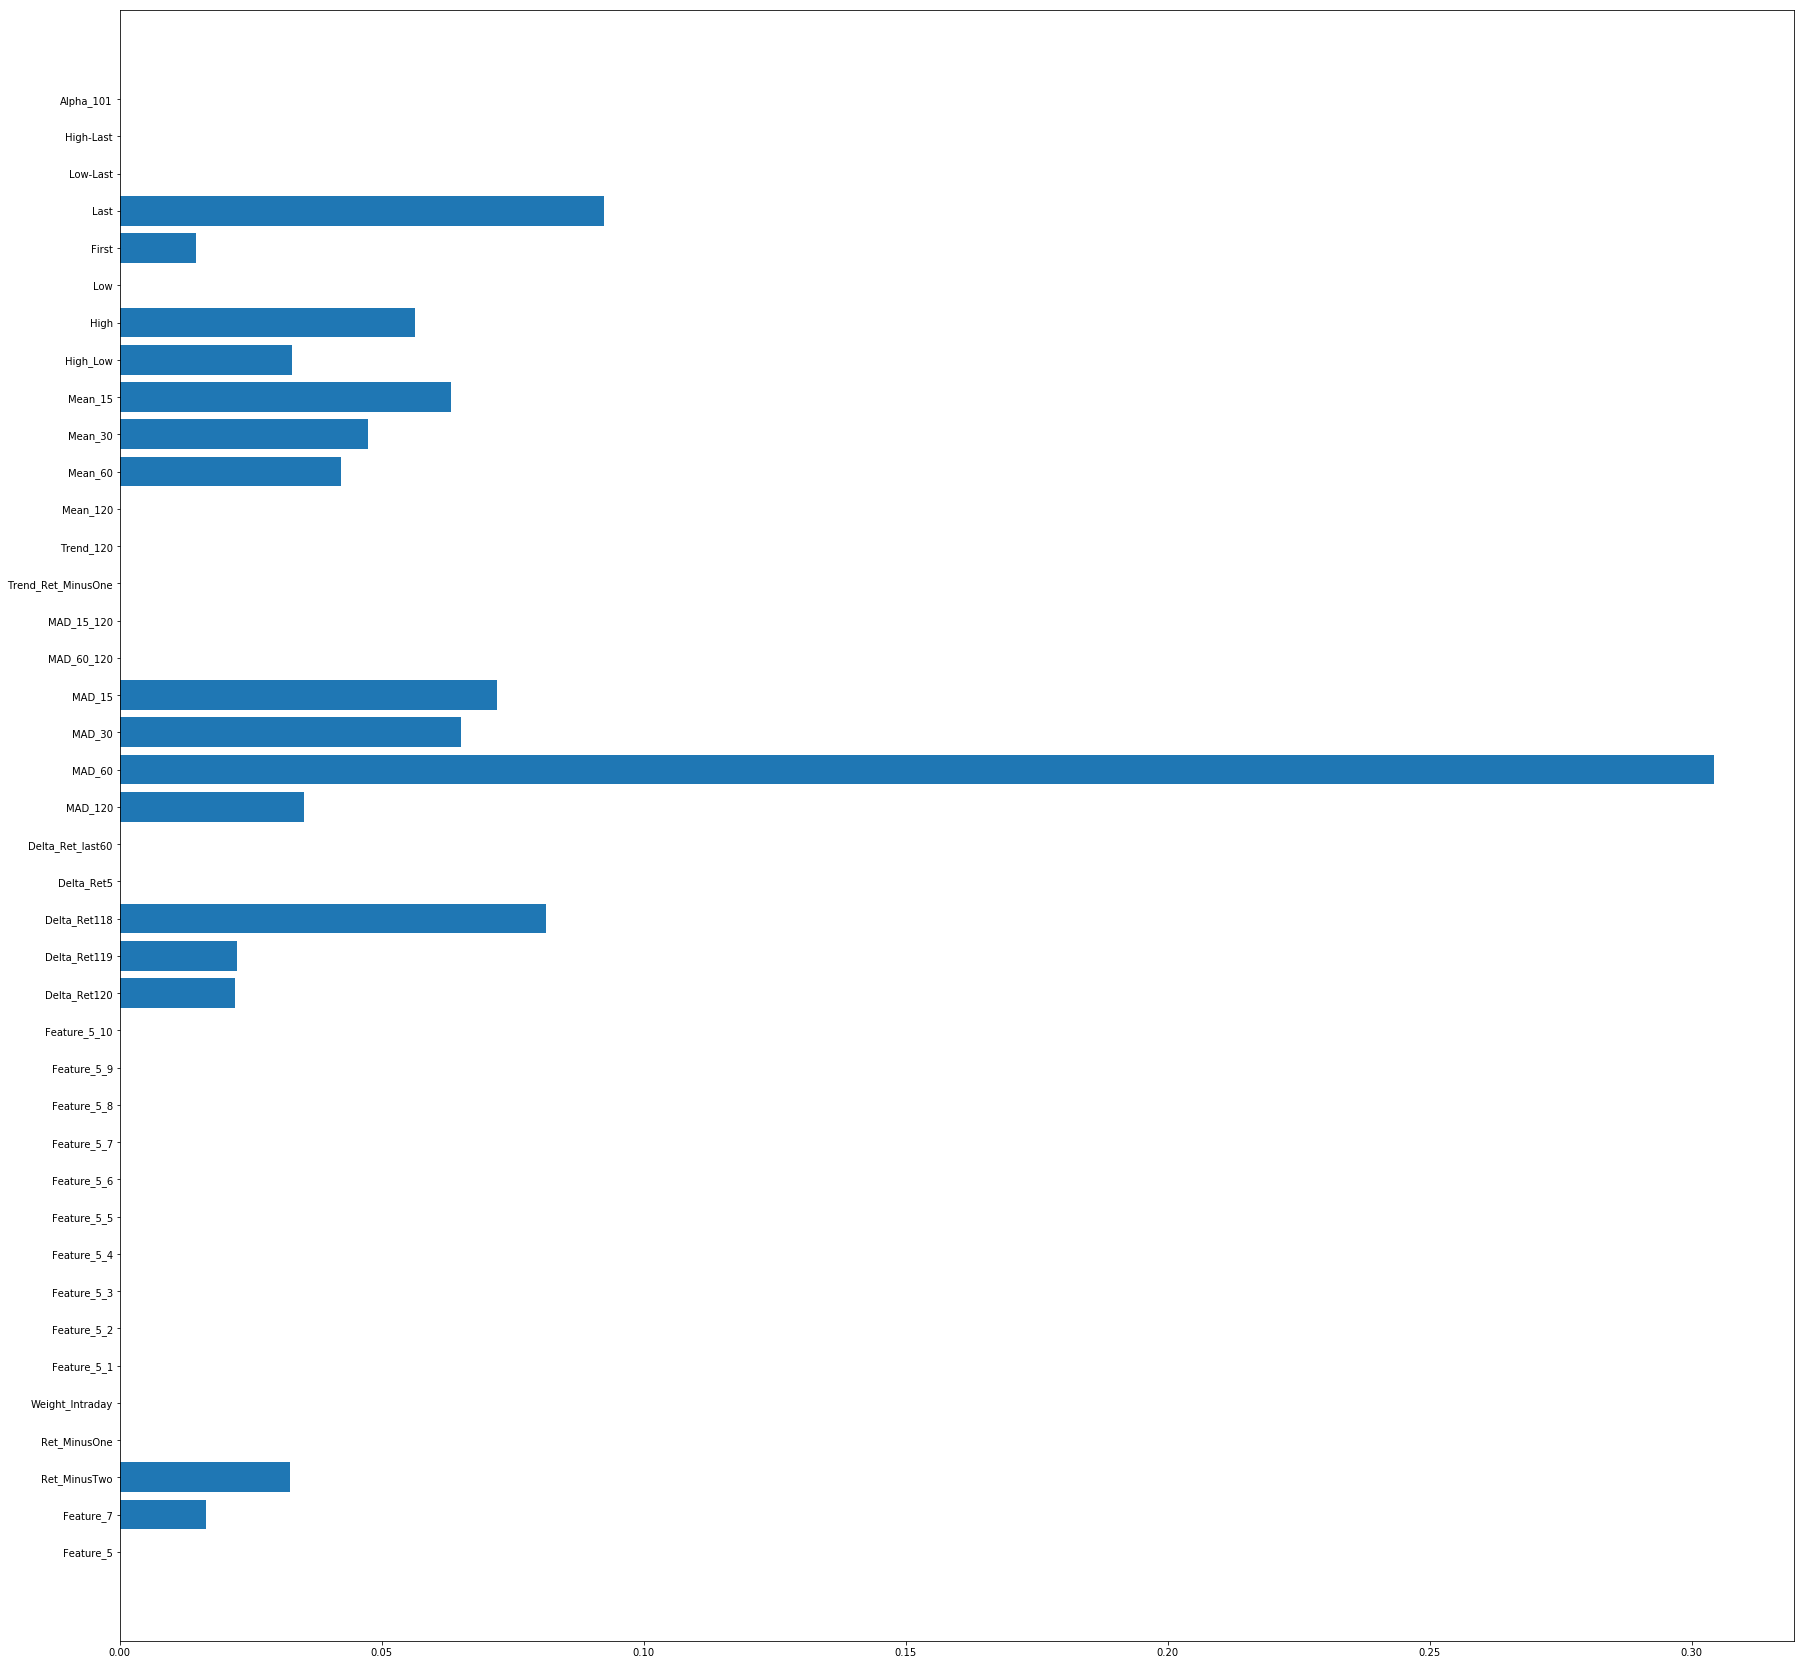

In [9]:
# selection
print('Start Selection')

def plot_feature_importance(model):
    n_features = X_train_scaled.shape[1]
    plt.figure(figsize=(30,30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values)
    

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 20, max_depth=2, random_state=0)

regr.fit(X_train_scaled, y_train)
print('fit')

print(regr.feature_importances_)
plot_feature_importance(regr)
### kurze zwischen finding, je höher ich die maximale tiefe wähle, desto wichtiger wird feature_7 hier sieht man klares overfitting



'''
from xgboost import XGBClassifier
from xgboost import plot_importance
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
# plot feature importance
plot_importance(model)
'''


#model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)
#X_new.shape               

# evaluation

### modelling

In [10]:
from sklearn.metrics import mean_absolute_error

pred_zero = np.zeros(shape= y_test.shape)
# create a rudimental Zero Benchamrk
mean_absolute_error(y_test, pred_zero, sample_weight=None, multioutput= 'uniform_average')
#mean_absolute_error(y_test, pred_zero, sample_weight=None, multioutput= 'raw_values')

0.0006446258787144891

In [11]:
### Ridge Regression
from sklearn.linear_model import Ridge

#Ridge unscaled unweighted
ridge = Ridge(alpha=.30)
ridge.fit(X_train, y_train)
ridge_score_train = mean_absolute_error(ridge.predict(X_train), y_train, sample_weight= X_train['Weight_Intraday'])
ridge_score_test = mean_absolute_error(ridge.predict(X_test), y_test, sample_weight= X_test['Weight_Intraday'])
print('Results for unscaled and unweighted ridge regression')
print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)
#logis_score_test = logis.score(data_test, label_test)
#print("Testing score: ",logis_score_test)

#Ridge scaled unweighted
ridge1 = Ridge(alpha=1.0)
ridge1.fit(X_train_scaled, y_train)
ridge_score_train = mean_absolute_error(ridge1.predict(X_train_scaled), y_train, sample_weight= X_train['Weight_Intraday'])
ridge_score_test = mean_absolute_error(ridge1.predict(X_test_scaled), y_test, sample_weight= X_test['Weight_Intraday'])
print('Results for scaled and unweighted ridge regression')
print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)

#Ridge scaled weighted
ridge2 = Ridge(alpha=.10)
ridge2.fit(X_train_scaled, y_train, sample_weight= X_train['Weight_Intraday'])
ridge_score_train = mean_absolute_error(ridge2.predict(X_train_scaled), y_train, sample_weight= X_train['Weight_Intraday'])
ridge_score_test = mean_absolute_error(ridge2.predict(X_test_scaled), y_test, sample_weight= X_test['Weight_Intraday'])
print('Results for scaled and weighted ridge regression')
print("Training score: ",ridge_score_train)
print("Test score: ",ridge_score_test)


'''
QUESTION: Not quite sure how to use the weights, Winton says
Weight_Intraday: weight used to evaluate intraday return predictions Ret 121 to 180
Weight_Daily: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).
therefore i asume i need them for the weights are for the scorer, but i could improve the 
'''

Results for unscaled and unweighted ridge regression
Training score:  0.0006040858940205472
Test score:  0.0006350812419158201
Results for scaled and unweighted ridge regression
Training score:  0.0006157247126934286
Test score:  0.0006478240092355063
Results for scaled and weighted ridge regression
Training score:  0.0006133690321736047
Test score:  0.0006444215081930356


'\nQUESTION: Not quite sure how to use the weights, Winton says\nWeight_Intraday: weight used to evaluate intraday return predictions Ret 121 to 180\nWeight_Daily: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).\ntherefore i asume i need them for the weights are for the scorer, but i could improve the \n'

In [12]:
### Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)
lasso.fit(X_train_scaled, y_train)
lasso_score_train = mean_absolute_error(lasso.predict(X_train_scaled), y_train, sample_weight= X_train['Weight_Intraday'])
lasso_score_test = mean_absolute_error(lasso.predict(X_test_scaled), y_test, sample_weight= X_test['Weight_Intraday'])
print('Results for scaled lasso regression')
print("Training score: ",lasso_score_train)
print("Test score: ",lasso_score_test)

lasso1 = Lasso(alpha = 1.0)
lasso1.fit(X_train, y_train)
lasso_score_train = mean_absolute_error(lasso1.predict(X_train), y_train, sample_weight= X_train['Weight_Intraday'])
lasso_score_test = mean_absolute_error(lasso1.predict(X_test), y_test, sample_weight= X_test['Weight_Intraday'])
print('Results for unscaled lasso regression')
print("Training score: ",lasso_score_train)
print("Test score: ",lasso_score_test)


Results for scaled lasso regression
Training score:  0.0005988084653868626
Test score:  0.000615406995800509
Results for unscaled lasso regression
Training score:  0.0005991629829393906
Test score:  0.0006160197671127945


In [60]:
### Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_for = RandomForestRegressor(n_estimators = 20, max_depth=2, random_state=0)
rand_for.fit(X_train, y_train)

train_score = mean_absolute_error(rand_for.predict(X_train), y_train, sample_weight= X_train['Weight_Intraday'])
test_score = mean_absolute_error(rand_for.predict(X_test), y_test, sample_weight= X_test['Weight_Intraday'])
print('Results for Random Forest max depth: ', rand_for.max_depth, 'estimators', rand_for.n_estimators)
print("Training score: ",train_score)
print("Test score: ",test_score)

# setting criterion to MAE causes extraordinary long runtimes what took seconds with mse wasn't done with mae after half an hour
#but maybe thats not necesarry because im not quite sure if criterion really has to do with our measurement
#gradien boost has a loss function and a criteria and the loss funcition sounds more like what i ment

Results for Random Forest max depth:  2 estimators 20
Training score:  0.0005970885900528174
Test score:  0.0006161261520610125


2


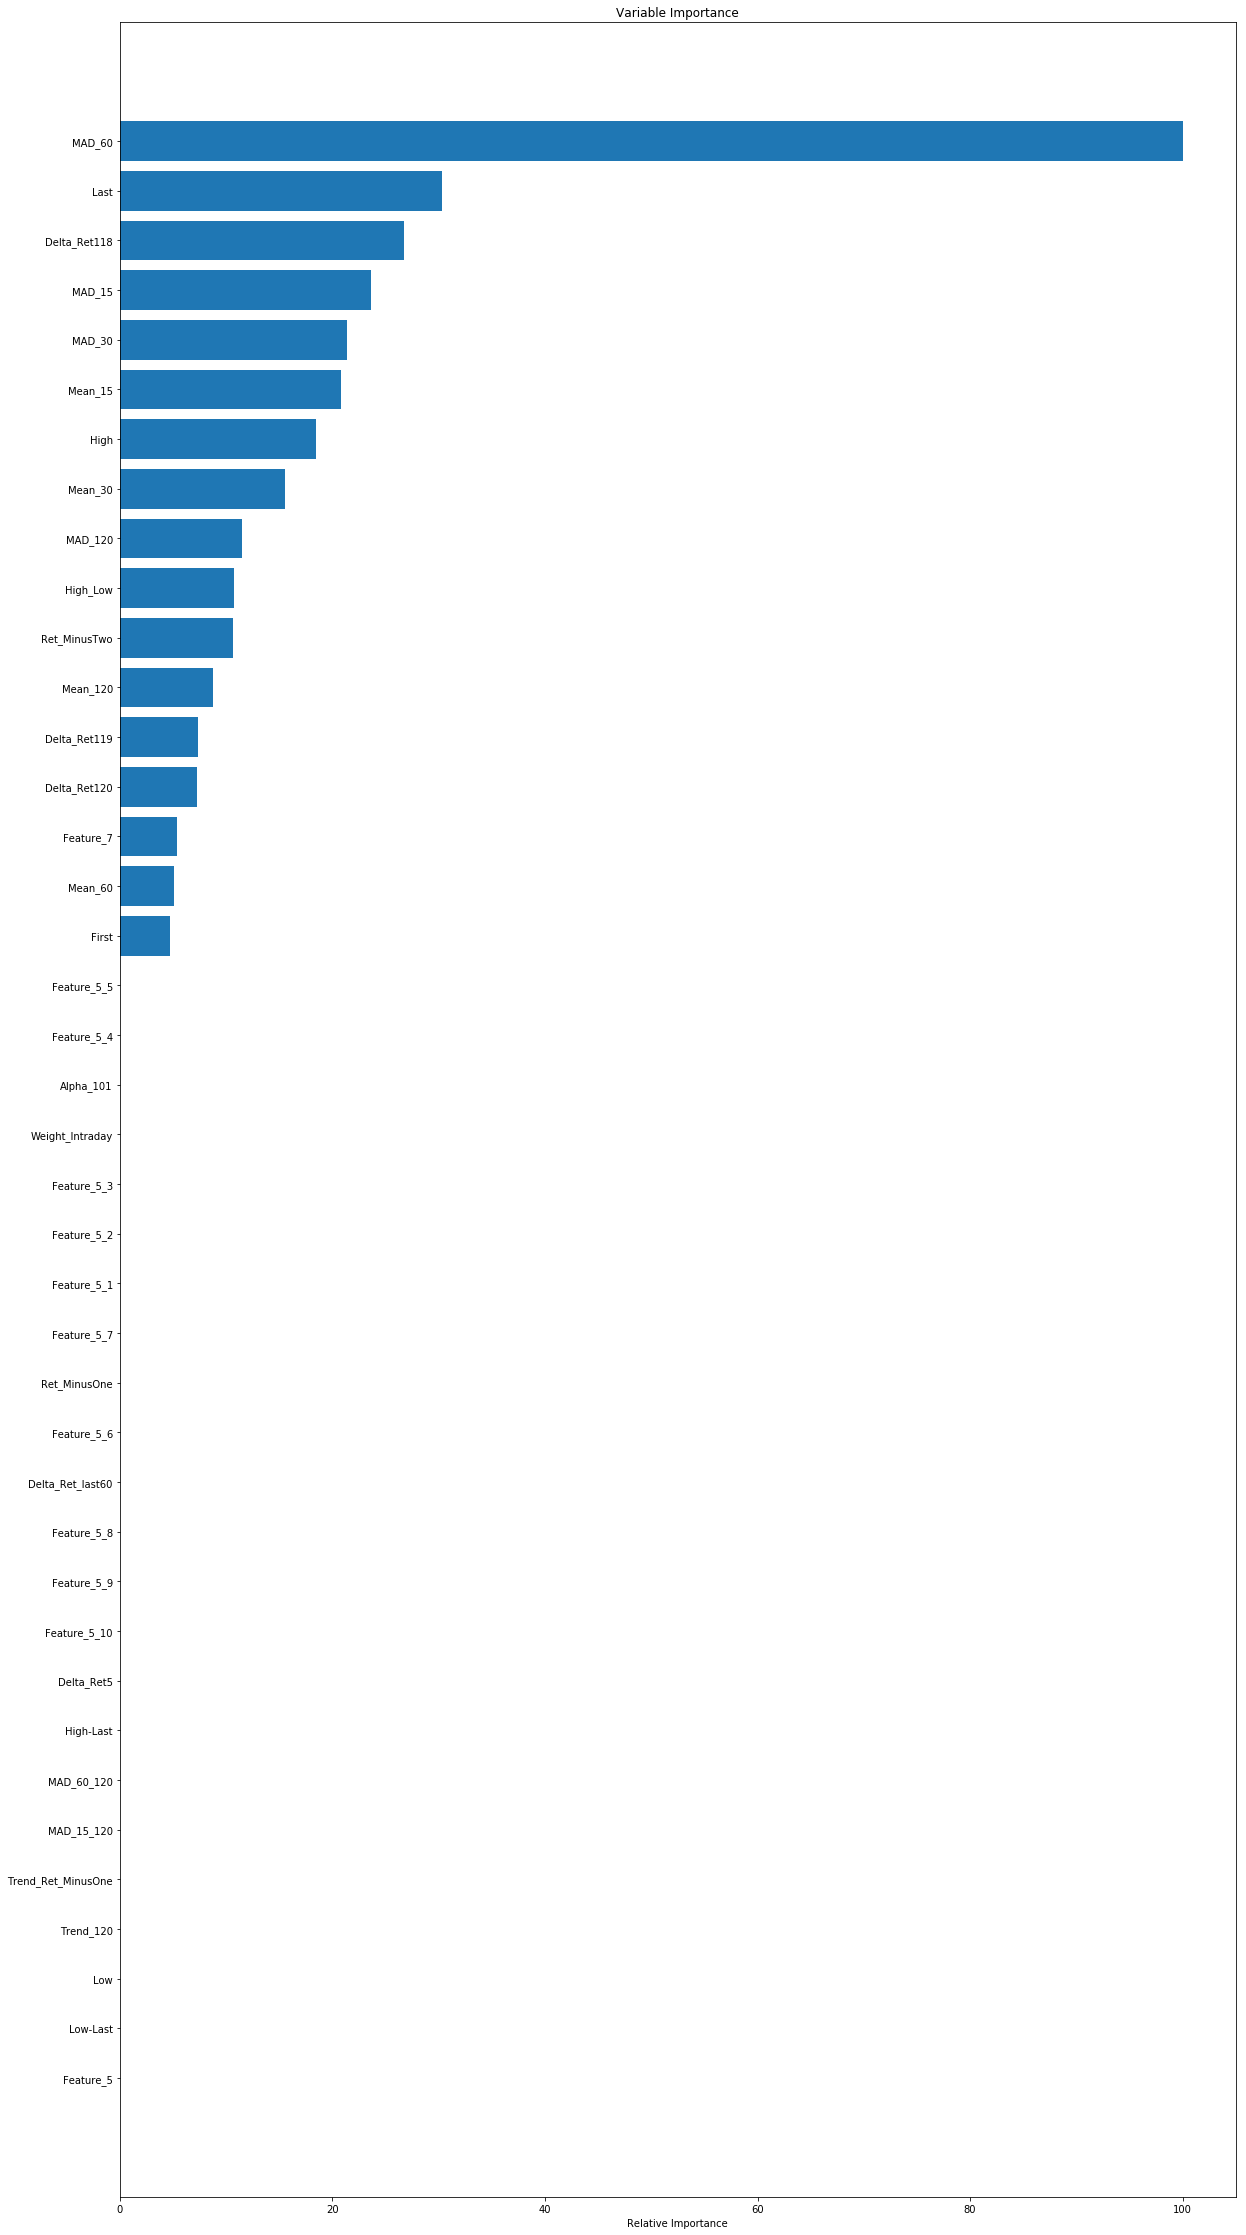

In [57]:
# Plot feature importance
feature_importance = rand_for.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [52]:
### Gradien Boost  ---> only allows one target value
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(loss='lad')
gbreg.fit(X_train, y_train['Ret_121'])



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
train_score = mean_absolute_error(gbreg.predict(X_train), y_train['Ret_121'], sample_weight= X_train['Weight_Intraday'])
test_score = mean_absolute_error(gbreg.predict(X_test), y_test['Ret_121'], sample_weight= X_test['Weight_Intraday'])
print('Results for Gradient Boost with standard values')
print("Training score: ",train_score)
print("Test score: ",test_score)


Results for Gradient Boost with standard values
Training score:  0.0005384645325610203
Test score:  0.0005959498872522931


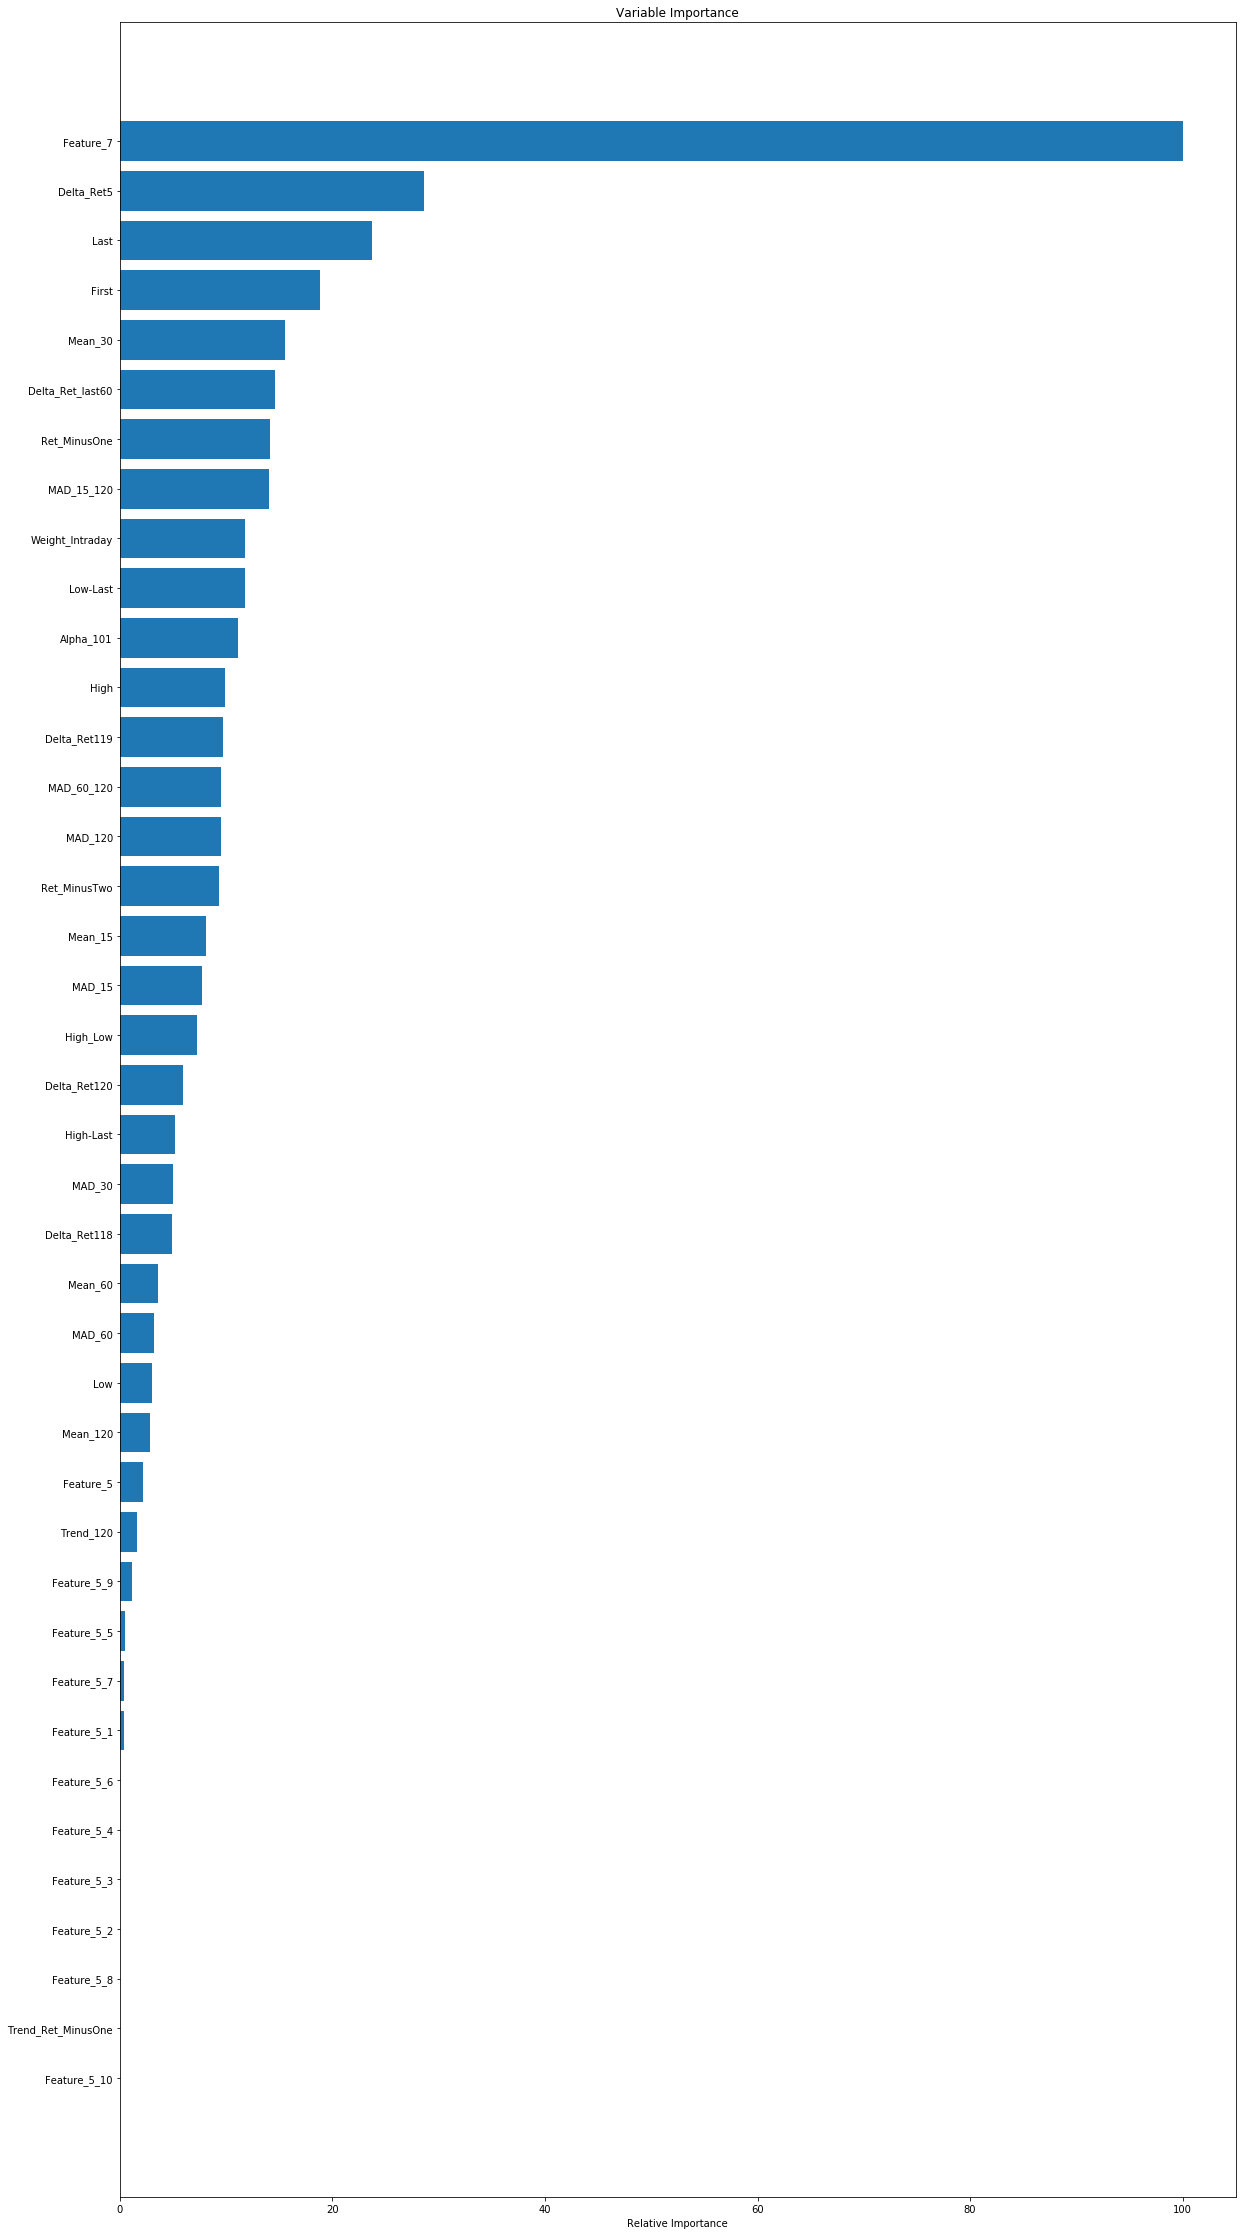

In [55]:
# Plot feature importance
feature_importance = gbreg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,40))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Preparing for Submission

In [75]:
df_test.shape #147
cols_to_drop_test = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_6', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25']
test_raw = df_test.drop(cols_to_drop_test, axis = 'columns')
df_test.shape #147
#print(test_raw.columns.tolist())

# encode feature 5
test_raw.Feature_5 = test_raw.Feature_5.astype(int)
Feature_5_dummies = pd.get_dummies(test_raw['Feature_5'], prefix  = "Feature_5")
#print(Feature_5_dummies)
# merging data

test_raw = pd.concat([test_raw, Feature_5_dummies], axis=1)
#print(test_raw.columns.tolist())
test_sort = test_raw.sort_values('Feature_7')
print(test_sort.shape)
###Imputation
test_imp = pd.DataFrame(mean_imputer.transform(test_sort[minute_returns]), columns= minute_returns, index = test_sort.index)
test = pd.concat([test_sort.drop(minute_returns,axis='columns'), test_imp], axis=1).drop('Id', axis=1)



['Id', 'Feature_5', 'Feature_7', 'Ret_MinusTwo', 'Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9', 'Ret_10', 'Ret_11', 'Ret_12', 'Ret_13', 'Ret_14', 'Ret_15', 'Ret_16', 'Ret_17', 'Ret_18', 'Ret_19', 'Ret_20', 'Ret_21', 'Ret_22', 'Ret_23', 'Ret_24', 'Ret_25', 'Ret_26', 'Ret_27', 'Ret_28', 'Ret_29', 'Ret_30', 'Ret_31', 'Ret_32', 'Ret_33', 'Ret_34', 'Ret_35', 'Ret_36', 'Ret_37', 'Ret_38', 'Ret_39', 'Ret_40', 'Ret_41', 'Ret_42', 'Ret_43', 'Ret_44', 'Ret_45', 'Ret_46', 'Ret_47', 'Ret_48', 'Ret_49', 'Ret_50', 'Ret_51', 'Ret_52', 'Ret_53', 'Ret_54', 'Ret_55', 'Ret_56', 'Ret_57', 'Ret_58', 'Ret_59', 'Ret_60', 'Ret_61', 'Ret_62', 'Ret_63', 'Ret_64', 'Ret_65', 'Ret_66', 'Ret_67', 'Ret_68', 'Ret_69', 'Ret_70', 'Ret_71', 'Ret_72', 'Ret_73', 'Ret_74', 'Ret_75', 'Ret_76', 'Ret_77', 'Ret_78', 'Ret_79', 'Ret_80', 'Ret_81', 'Ret_82', 'Ret_83', 'Ret_84', 'Ret_85', 'Ret_86', 'Ret_87', 'Ret_88', 'Ret_89', 'Ret_90', 'Ret_91', 'Ret_92', 'Ret_93', 'Ret_94', 'Ret_95', 'Re

In [76]:

###Feature engineeing
print('count_features_before', count_test_features)
print('Shape: ', test.shape)
#Delta Return
test['Delta_Ret120'] = pd.DataFrame((test[minute_returns].cumsum(axis=1))).iloc[:,-1]
test['Delta_Ret119'] = pd.DataFrame((test[minute_returns].cumsum(axis=1))).iloc[:,-2]
test['Delta_Ret118'] = pd.DataFrame((test[minute_returns].cumsum(axis=1))).iloc[:,-3]
test['Delta_Ret5'] = pd.DataFrame(test[minute_returns[len(minute_returns)-5:len(minute_returns)]].cumsum(axis=1)).iloc[:, -1]
test['Delta_Ret_last60'] = pd.DataFrame(test[minute_returns[len(minute_returns)-60:len(minute_returns)]].cumsum(axis=1)).iloc[:, -1]
#weird behaviour when i select the last column with minus one all good but when im selecting the last
# few minus one gives me the second last ---> solved difference in indexing of range and location

#concat
#df_Delta_Ret = pd.DataFrame(pd.concat([Delta_Ret120, Delta_Ret119, Delta_Ret118, Delta_Ret5], axis=1).values, columns= ['Delta_Ret120', 'Delta_Ret119', 'Delta_Ret118', 'Delta_Ret5'], index = X_train.index)

print('Shape: ', test.shape)
#Volatility

#MAD
test['MAD_120'] = test[minute_returns].mad(axis=1).rename('MAD_120')
test['MAD_60'] = test[minute_returns[len(minute_returns)-60:len(minute_returns)]].mad(axis=1).rename('MAD_60')
test['MAD_30'] = test[minute_returns[len(minute_returns)-30:len(minute_returns)]].mad(axis=1).rename('MAD_30')
test['MAD_15'] = test[minute_returns[len(minute_returns)-15:len(minute_returns)]].mad(axis=1).rename('MAD_15')
#ratio of last 15 to 120 stuff like that
test['MAD_60_120'] = test.MAD_60.divide(test.MAD_120)
test['MAD_15_120'] = test.MAD_15.divide(test.MAD_120)

print('Shape: ', X_test.shape)

#concat
#df_MAD = (pd.concat([MAD_120, MAD_60, MAD_30, MAD_15], axis = 1))

#Trend_previous
#df['binary'] = (df['number'] < 15).astype(int)
#print((X_train['Ret_MinusOne'] < 0).astype(int))
test['Trend_Ret_MinusOne'] = (test['Ret_MinusOne'] < 0).astype(int)
test['Trend_120'] = (test['Ret_120'] < 0).astype(int)
#X_train['Trend_cum_120'] = (Delta_Ret120 < 0).astype(int) problem with indexing

#MEAN last 120 60 30 15
test['Mean_120']  = test[minute_returns].mean(axis=1)
test['Mean_60'] = test[minute_returns[len(minute_returns)-60:len(minute_returns)]].mean(axis=1)
test['Mean_30'] = test[minute_returns[len(minute_returns)-30:len(minute_returns)]].mean(axis=1)
test['Mean_15'] = test[minute_returns[len(minute_returns)-15:len(minute_returns)]].mean(axis=1)
#difference in means
#trend mean

test['High_Low'] = test[minute_returns].max(axis=1).sub(test[minute_returns].min(axis=1))

#first half vs last half

test['High'] = test[minute_returns].max(axis=1)
test['Low'] = test[minute_returns].min(axis=1)
test['First'] = test['Ret_2']
test['Last'] = test['Ret_120']
#binning last minute

#Alphas
test['Low-Last'] =test.Low.sub(test.Last)
test['High-Last']=test.High.sub(test.Last)
test['Alpha_101'] = (test['Delta_Ret120'].divide(test['High_Low'].add(0.001)))
#X_train['Alpha_54'] = ()

print('Feature calculations all done')
print (count_test_features - test.shape[1], ' New Features generated')

print("Shape of train", X_train.shape)
print('Shape of test-train', X_test.shape)
print('Shape of test', test.shape)



count_features_before 134
Shape:  (120000, 133)
Shape:  (120000, 138)
Shape:  (13200, 40)
Feature calculations all done
-24  New Features generated
Shape of train (26800, 40)
Shape of test-train (13200, 40)
Shape of test (120000, 158)


In [77]:
###scaling
#test_scaled = pd.DataFrame(scaler.transform(test), index = test.index, columns = test.columns).drop(minute_returns, axis = 'columns')
print
#print( 'Shape of test_scaled', test_scaled.shape)

ValueError: operands could not be broadcast together with shapes (120000,158) (159,) (120000,158) 